In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os
import glob
import util

# Util Demo

In [2]:
data_dir1 = "data/acquisitions/S1/G1"
data_dir2 = "data/acquisitions/S3/G1"

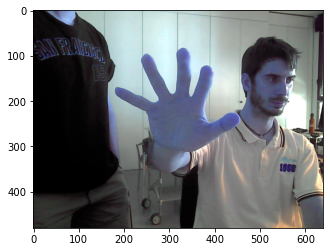

In [3]:
im_color = cv2.imread(data_dir2 + "/8-color.png", cv2.IMREAD_COLOR)
plt.imshow(im_color)

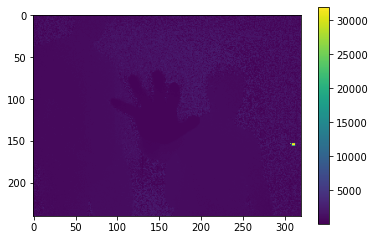

In [4]:
# Read form depth map
im = util.read_depth_map(data_dir2 + "/8-depth.bin")
plt.imshow(im)
plt.colorbar()

In [13]:
def binarize(im, threshold=50, kernel=np.ones((4,4)), display=False):
    '''
    args:
        im: input image (any scale, any type) as grayscale numpy array.
        threshold: threshold value for simple thresholding
        kernel: kernel for eroding and dilating operations to remove noise
        display: boolean variable to designate whether or not result is displayed or not. 
    output: 
        im: binarize image
    '''
    
    # Filter out extreme levels of noise
    im[im>5000] = 0
    im = im/im.max() * 255
    im = im.astype(np.uint8)
    im[im > 50] = 0
    plt.imshow(im)
    plt.colorbar()
    plt.show()
    im = cv2.erode(im, kernel)
    im = cv2.dilate(im, kernel)
    
    if display is True:
        plt.imshow(im)
        plt.colorbar()
        plt.show()
    return im

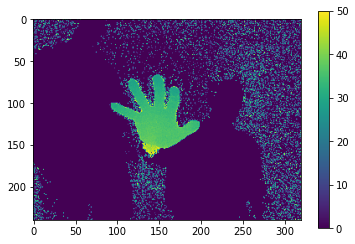

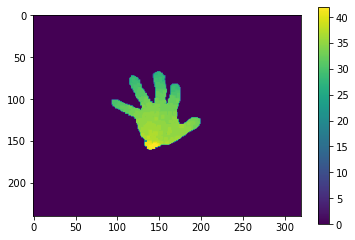

In [14]:
# Binarize
binary_im = binarize(im, display=True)

In [ ]:
img = im.astype(np.uint8)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Junk

In [ ]:
def binarize(im, threshold=50, kernel=np.ones((4,4)), display=False):
    im = im/im1.max() * 255
    im = im.astype(np.uint8)
    im[im > 50] = 0
    im = cv2.erode(im, kernel)
    im = cv2.dilate(im, kernel)
    
    if display is True:
        plt.imshow(im)
        plt.colorbar()
        plt.show()
    return im

In [ ]:
with open(data_dir1 + '/1-depth.bin', mode='rb') as f:
    im1 = np.fromfile(f,dtype=np.uint16,count=w*h).reshape(h,w)
binarize(im1, display=True)

In [ ]:
#
# First Image
#

w, h = 320, 240
with open(data_dir1 + '/1-depth.bin', mode='rb') as f:
    im1 = np.fromfile(f,dtype=np.uint16,count=w*h).reshape(h,w)
im1 = im1/im1.max() * 255
im1 = im1.astype(np.uint8)
im1[im1 > 50] = 0

kernel = np.ones((4,4))
im1 = cv2.erode(im1, kernel)
im1 = cv2.dilate(im1, kernel)

plt.imshow(im1)
plt.colorbar()
plt.show()

plt.hist(im1,bins = np.arange(0,255, 51)) 
plt.title("histogram") 
plt.show()

In [ ]:
#
# Second Image
#
w, h = 320, 240
with open(data_dir2 + '/1-depth.bin', mode='rb') as f:
    im1 = np.fromfile(f,dtype=np.uint16,count=w*h).reshape(h,w)
im1 = im1/im1.max() * 255
im1 = im1.astype(np.uint8)
im1[im1 > 50] = 0

kernel = np.ones((4,4))
im1 = cv2.erode(im1, kernel)
im1 = cv2.dilate(im1, kernel)

plt.imshow(im1)
plt.colorbar()
plt.show()

plt.hist(im1,bins = np.arange(0,255, 51)) 
plt.title("histogram") 
plt.show()